# Very First Look of Auxtel CALEXP with firefly

- Goal verification 
- Restart the Kernel first

- author : Sylvie Dagoret-campagne
- affiliation : IJCLab/in2p3/CNRS
- creation date : 2025-01-09
- update : 2025-01-09
- update : 2025-01-09 : fix the date decoding (w_2024_50)
- last update : 2026-01-13 :
- last update : 2026-01-22 : Include night from 2025-01-20

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm,SymLogNorm
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import matplotlib.colors as mcolors
import matplotlib.cm as cmx
import matplotlib.cm as cm


%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
from spectractor.tools import from_lambda_to_colormap, wavelength_to_rgb
#%matplotlib widget 
import h5py
from scipy import interpolate
from astropy.time import Time
from datetime import datetime, timedelta
import seaborn as sns

from itertools import cycle, islice
import os

In [2]:
plt.rcParams["figure.figsize"] = (18,8)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'
plt.rcParams['legend.fontsize']=  12
plt.rcParams['font.size'] = 12

In [3]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch

transform = AsinhStretch() + PercentileInterval(99.)

In [4]:
from lsst.daf.butler import Butler 
import astropy.units as u
import numpy as np 
import pandas as pd
pd.set_option("display.max_columns", None)
from astropy.time import Time

import scipy.stats

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

In [5]:
# LSST Display
# The advantage to use firefly is that the firefly display can handle a lotsof images
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('firefly')

## Configuration

- Use the tag report to guess the collections in which we exect data :  https://usdf-rsp-dev.slac.stanford.edu/times-square/github/lsst-dm/vv-team-notebooks/TargetReport

In the case of LSSTComCam:

- https://usdf-rsp-dev.slac.stanford.edu/times-square/github/lsst-dm/vv-team-notebooks/TargetReport?day_obs=2024-10-24&instrument=LSSTComCam&repo=embargo_new&collection=LSSTComCam%2Fprompt%2Foutput-2024-10-24&collection_sky=LSSTComCamSim%2Fruns%2FDRP%2FOR4%2Fw_2024_25%2FDM-45066&skymap_name=ops_rehersal_prep_2k_v1&col_sciprog=science_program&col_target=target&col_filter=filter&col_id=id&ts_hide_code=1

In [6]:
instrument = "LATISS"
#collection = 'u/dagoret/auxtel_atmosphere_202501_v3.1.0_doSensorFlat_rebin2_lockedOrder2_FixA1_FixA2_FitAngstrom_freePressure_newThroughput6_BG40Scaled1.09_AtmoFitPressureA2_SpecErr_No5SigmaClip_w_2024_50_oldptc-test20250109b'
collection = 'u/dagoret/auxtel_atmosphere_202501_v3.1.0_doSensorFlat_rebin2_lockedOrder2_FixA1_FixA2_FitAngstrom_freePressure_newThroughput6_BG40Scaled1.09_AtmoFitPressureA2_SpecErr_No5SigmaClip_w_2024_50_newptc-test20250110a'
# 2025-01-21
collection = "u/dagoret/auxtel_atmosphere_202501_v3.1.0_doSensorFlat_rebin2_lockedOrder2_FixA1_FixA2_FitAngstrom_freePressure_newThroughput6_BG40Scaled1.09_AtmoFitPressureA2_SpecErr_No5SigmaClip_w_2024_50_test20250121a"
#20250121T124042Z

In [7]:
#import lsst.daf.butler as dafButler
import lsst.summit.utils.butlerUtils as butlerUtils
butler = butlerUtils.makeDefaultLatissButler(embargo=True)

repo = "/repo/main"
repo = "/repo/embargo"
# repo = "LATISS"
#butler = dafButler.Butler(repo)
registry = butler.registry

/tmp/ipykernel_8754/811162145.py:3: FutureWarning: Call to deprecated function (or staticmethod) makeDefaultLatissButler. (Use the more generic makeDefaultButler('LATISS'). Will be removed after v28.0.) -- Deprecated since version v27.0.
  butler = butlerUtils.makeDefaultLatissButler(embargo=True)


## Query about the collections available

- select collections LATISS

In [8]:
for c in sorted(registry.queryCollections()):
    #if "u/jneveu" in c and "auxtel_atmo" in c and "SensorFlat" in c and "FixA1" in c:
    #if "u/dagoret" in c and "auxtel_atmo" in c and "SensorFlat" in c and "FixA1" in c:
    if "u/dagoret" in c and "auxtel_atmo":
        print(c)

u/dagoret/auxtel_atmosphere_202501_v3.1.0_doSensorFlat_rebin2_lockedOrder2_FixA1_FixA2_FitAngstrom_freePressure_newThroughput6_BG40Scaled1.09_AtmoFitPressureA2_SpecErr_No5SigmaClip_w_2024_50_newptc-test20250110a
u/dagoret/auxtel_atmosphere_202501_v3.1.0_doSensorFlat_rebin2_lockedOrder2_FixA1_FixA2_FitAngstrom_freePressure_newThroughput6_BG40Scaled1.09_AtmoFitPressureA2_SpecErr_No5SigmaClip_w_2024_50_newptc-test20250110a/20250110T111941Z
u/dagoret/auxtel_atmosphere_202501_v3.1.0_doSensorFlat_rebin2_lockedOrder2_FixA1_FixA2_FitAngstrom_freePressure_newThroughput6_BG40Scaled1.09_AtmoFitPressureA2_SpecErr_No5SigmaClip_w_2024_50_oldptc-test20250109
u/dagoret/auxtel_atmosphere_202501_v3.1.0_doSensorFlat_rebin2_lockedOrder2_FixA1_FixA2_FitAngstrom_freePressure_newThroughput6_BG40Scaled1.09_AtmoFitPressureA2_SpecErr_No5SigmaClip_w_2024_50_oldptc-test20250109/20250109T101849Z
u/dagoret/auxtel_atmosphere_202501_v3.1.0_doSensorFlat_rebin2_lockedOrder2_FixA1_FixA2_FitAngstrom_freePressure_newThrou

In [9]:
for _ in butler.registry.queryCollections():
    if 'LATISS/' in _:
        print(_)

LATISS/calib/DM-36484/biasGen.20221005a/20221006T000101Z
LATISS/calib/DM-36484/darkGen.20221006a/20221006T222921Z
LATISS/calib/DM-36484/flatGen-SDSSg.20221006a/20221007T002703Z
LATISS/calib/DM-36484/flatGen-SDSSi.20221006a/20221007T003732Z
LATISS/calib/DM-36484/flatGen-SDSSr.20221006a/20221006T233657Z
LATISS/calib/DM-36719/biasGen.20221107b/20221107T213306Z
LATISS/calib/DM-36719/darkGen.20221107a/20221107T223409Z
LATISS/calib/DM-36719/flatGen-SDSSg.20221107a/20221108T002737Z
LATISS/calib/DM-36719/flatGen-SDSSi.20221107a/20221108T005202Z
LATISS/calib/DM-36719/flatGen-SDSSr.20221107a/20221107T235401Z
LATISS/calib/DM-37587/flatGen-BG40.20230113a/20230113T211456Z
LATISS/calib/DM-37587/flatGen-OG550.20230113b/20230113T213305Z
LATISS/calib/DM-37587/flatGen-SDSSr.20230113c/20230113T214159Z
LATISS/calib/DM-38946/noRGseq/biasGen.20230428a/20230428T210637Z
LATISS/calib/DM-38946/noRGseq/darkGen.20230428a/20230428T213424Z
LATISS/calib/DM-38946/noRGseq/flatGen-g.20230501a/20230501T203920Z
LATISS/ca

- From the list available today , we probably have to look inside the colleciton `LSSTComCam/nightlyValidation`

## Create the butler on the selected collection

In [10]:
for datasetType in registry.queryDatasetTypes():
    if registry.queryDatasets(datasetType, collections=collection).any(execute=False, exact=False):
        # Limit search results to the data products
        if ('_config' not in datasetType.name) and ('_log' not in datasetType.name) and ('_metadata' not in datasetType.name) and ('_resource_usage' not in datasetType.name):
            print(datasetType)

DatasetType('raw', {band, instrument, day_obs, detector, group, physical_filter, exposure}, Exposure)
DatasetType('uw_stars_20240228', {htm7}, SimpleCatalog)
DatasetType('atlas_refcat2_20220201', {htm7}, SimpleCatalog)
DatasetType('gaia_dr3_20230707', {htm7}, SimpleCatalog)
DatasetType('bias', {instrument, detector}, ExposureF, isCalibration=True)
DatasetType('camera', {instrument}, Camera, isCalibration=True)
DatasetType('crosstalk', {instrument, detector}, CrosstalkCalib, isCalibration=True)
DatasetType('dark', {instrument, detector}, ExposureF, isCalibration=True)
DatasetType('defects', {instrument, detector}, Defects, isCalibration=True)
DatasetType('flat', {band, instrument, detector, physical_filter}, ExposureF, isCalibration=True)
DatasetType('transmission_filter', {band, instrument, physical_filter}, TransmissionCurve, isCalibration=True)
DatasetType('transmission_optics', {instrument}, TransmissionCurve, isCalibration=True)
DatasetType('transmission_sensor', {instrument, detec

- Notice no visit-Table is available. Thus to know which visiId are existing, we will use the registry later

## Extract the list of visitId from the butler's registry 

### Get the list of information that can be extracted from the registryfor each exposure

In [11]:
print(registry.dimensions["exposure"].RecordClass.fields)

exposure: 
  instrument: str
  id: int
  day_obs: int
  group: str
  physical_filter: str
  obs_id: str
  exposure_time: float
  dark_time: float
  observation_type: str
  observation_reason: str
  seq_num: int
  seq_start: int
  seq_end: int
  target_name: str
  science_program: str
  tracking_ra: float
  tracking_dec: float
  sky_angle: float
  azimuth: float
  zenith_angle: float
  has_simulated: bool
  can_see_sky: bool
  timespan: lsst.daf.butler.Timespan


### Create the pandas dataframe from the information inside the butler's registry

In [12]:
df_exposure = pd.DataFrame(columns=['id', 'obs_id','day_obs', 'seq_num','time_start','time_end' ,'type', 'target','filter','zenith_angle','expos','ra','dec','skyangle','azimuth','zenith','science_program','jd','mjd'])

### Fill the pandas dataframe from the records inside the butler's registry for each exposure having a datasets='spectractorSpectrum'

In that wayn the filling of the pandas dataframe logbook is faster.

In [13]:
where_expr = "instrument='LATISS'"
records = list(butler.registry.queryDimensionRecords('visit', datasets='spectractorSpectrum', where=where_expr ,  collections=collection))
refs = list(set(butler.registry.queryDatasets('spectractorSpectrum',  where=where_expr,  collections=collection)))

In [14]:
print(f">>> Number of reconstructed spectra : {len(records)} \n in collection {collection}")
records[0]

>>> Number of reconstructed spectra : 659 
 in collection u/dagoret/auxtel_atmosphere_202501_v3.1.0_doSensorFlat_rebin2_lockedOrder2_FixA1_FixA2_FitAngstrom_freePressure_newThroughput6_BG40Scaled1.09_AtmoFitPressureA2_SpecErr_No5SigmaClip_w_2024_50_test20250121a


visit.RecordClass(instrument='LATISS', id=2025010700182, day_obs=20250107, physical_filter='empty~holo4_003', name='AT_O_20250107_000182', seq_num=182, exposure_time=30.0, target_name='HD38666', observation_reason='object', science_program='spec-survey', azimuth=103.13421919070979, zenith_angle=30.098922292281927, region=ConvexPolygon([UnitVector3d(0.0531343316148516, 0.8435819685851369, -0.5343652356599072), UnitVector3d(0.05153791677678792, 0.8429057443476968, -0.5355872937999595), UnitVector3d(0.05016747106056242, 0.8438074518109053, -0.5342959939170183), UnitVector3d(0.05176388597948025, 0.8444836760060161, -0.5330739358359863)]), timespan=Timespan(begin=astropy.time.Time(2460684.0, -0.45969166653230326, scale='tai', format='jd'), end=astropy.time.Time(2460684.0, -0.45934180555555554, scale='tai', format='jd')))

In [15]:
def get_whereclause(expos_id):
    return f"exposure.id = {expos_id} and instrument = \'LATISS\'"

In [16]:
#for count, info in enumerate(registry.queryDimensionRecords('exposure',where = where_expr)):  
list_of_ids = np.zeros(len(records)).astype(int)
# first loop on records 'spectractorSpectrum'
for count, r in enumerate(records):
    the_whereclause = get_whereclause(r.id)
    list_of_ids[count] = r.id
    # then select in the registry the entry with the proper id
    for count2, info in enumerate(registry.queryDimensionRecords('exposure',where= the_whereclause)):
    
        try:
            # decode entry in the registry
            id_ = info.id
            obs_id_ = info.obs_id
            day_obs_ = info.day_obs
            seq_num_ = info.seq_num
            timespan_ = info.timespan

            timespan_begin_ = pd.to_datetime(info.timespan.begin.to_datetime())
            timespan_end_ = pd.to_datetime(info.timespan.end.to_datetime())
            timespan_jd_ = timespan_.begin.jd
            timespan_mjd_ = timespan_.begin.mjd
            
            
            
            df_exposure.loc[count] = [info.id, info.obs_id, info.day_obs, info.seq_num,timespan_begin_,timespan_end_ ,info.observation_type, info.target_name, info.physical_filter, info.zenith_angle, \
                             info.exposure_time,info.tracking_ra, info.tracking_dec, info.sky_angle,info.azimuth ,info.zenith_angle, info.science_program,
                             timespan_jd_,timespan_mjd_  ]
        
        
            
        except:
            #print(">>>   Unexpected error:", sys.exc_info()[0])
            #info_timespan_begin_to_string = "2021-01-01 00:00:00.00"
            #info_timespan_end_to_string = "2051-01-01 00:00:00.00"

            info_timespan_begin_to_string = info.group
            info_timespan_end_to_string = info.group

            info_timespan_begin_mjd  = Time(info_timespan_begin_to_string).mjd
            info_timespan_begin_jd = Time(info_timespan_begin_to_string).jd
            
            #print("\t >>>> after error try to recover mjd and jd == > mjd, jd = ",info_timespan_begin_mjd ,info_timespan_begin_jd )
            
            
            #info_timespan_begin_jd = 0
            #info_timespan_begin_mjd = 0
            df_exposure.loc[count] = [info.id, info.obs_id, info.day_obs, info.seq_num,
                                  pd.to_datetime(info_timespan_begin_to_string),
                                  pd.to_datetime(info_timespan_end_to_string) ,
                                  info.observation_type, info.target_name, 
                                  info.physical_filter, \
                             info.exposure_time,info.tracking_ra, info.tracking_dec, info.sky_angle,info.azimuth ,info.zenith_angle, info.science_program,
                             info_timespan_begin_jd, info_timespan_begin_mjd  ]
         
    
        if count < 3:
            print("-----------------------------------------------------",count,"---------------------------------------------------------")
            print(info)
            print("\t id:                  ",info.id)
            print("\t day_obs:             ",info.day_obs)
            print("\t info_group.          ",info.group)
            print("\t seq_num:             ",info.seq_num)
            print("\t type-of-observation: ",info.observation_type)
            print("\t target:              ",info.target_name)

            timespan_ = info.timespan
            timespan_begin_ = pd.to_datetime(info.timespan.begin.to_datetime())
            timespan_end_ = pd.to_datetime(info.timespan.end.to_datetime())
            timespan_jd_ = timespan_.begin.jd
            timespan_mjd_ = timespan_.begin.mjd
        
            mjd = timespan_mjd_ 
            jd = timespan_jd_ 
            print("MJD,JD : ",mjd,jd)
        
            

----------------------------------------------------- 0 ---------------------------------------------------------
exposure:
  instrument: 'LATISS'
  id: 2025010700182
  day_obs: 20250107
  group: '2025-01-08T00:52:27.381'
  physical_filter: 'empty~holo4_003'
  obs_id: 'AT_O_20250107_000182'
  exposure_time: 30.0
  dark_time: 30.228
  observation_type: 'science'
  observation_reason: 'object'
  seq_num: 182
  seq_start: 182
  seq_end: 182
  target_name: 'HD38666'
  science_program: 'spec-survey'
  tracking_ra: 86.49807807768686
  tracking_dec: -32.29939160039225
  sky_angle: 42.96737851357311
  azimuth: 103.13421919070979
  zenith_angle: 30.098922292281927
  has_simulated: False
  can_see_sky: True
  timespan: Timespan(begin=astropy.time.Time(2460684.0, -0.45969166653230326, scale='tai', format='jd'), end=astropy.time.Time(2460684.0, -0.45934180555555554, scale='tai', format='jd'))
	 id:                   2025010700182
	 day_obs:              20250107
	 info_group.           2025-01-08T

#### convert some columns into integer

In [17]:
df_exposure = df_exposure.astype({"id": int,'day_obs': int,'seq_num':int,'jd':int,'mjd':int})

### Find the different type of exposures

- By definition 'spectractorSpectrum' are science type

In [18]:
df_exposure["type"].unique()

array(['science'], dtype=object)

### Select the science exposure

In [19]:
# select just in case there is no pre-selection of 'spectractorSpectrum'
selection_criteria = (df_exposure.type == 'science') & (df_exposure.science_program == 'spec-survey')
df_science = df_exposure[selection_criteria]

In [20]:
df_science

,id,obs_id,day_obs,seq_num,time_start,time_end,type,target,filter,zenith_angle,expos,ra,dec,skyangle,azimuth,zenith,science_program,jd,mjd
0,2025010700182,AT_O_20250107_000182,20250107,182,2025-01-08 00:58:02.640012,2025-01-08 00:58:32.868,science,HD38666,empty~holo4_003,30.098922,30.0,86.498078,-32.299392,42.967379,103.134219,30.098922,spec-survey,2460683,60683
1,2025010700183,AT_O_20250107_000183,20250107,183,2025-01-08 00:58:47.181995,2025-01-08 00:59:17.409,science,HD38666,BG40_65mm_1~holo4_003,29.940825,30.0,86.498142,-32.299507,42.796859,103.103542,29.940825,spec-survey,2460683,60683
2,2025010700184,AT_O_20250107_000184,20250107,184,2025-01-08 00:59:33.401016,2025-01-08 01:00:03.631,science,HD38666,OG550_65mm_1~holo4_003,29.779199,30.0,86.498215,-32.299622,42.626702,103.072450,29.779199,spec-survey,2460683,60683
3,2025010700190,AT_O_20250107_000190,20250107,190,2025-01-08 01:07:24.103995,2025-01-08 01:07:54.342,science,HD38666,empty~holo4_003,28.125700,30.0,86.497694,-32.300049,41.948343,102.769602,28.125700,spec-survey,2460683,60683
4,2025010700192,AT_O_20250107_000192,20250107,192,2025-01-08 01:08:55.083988,2025-01-08 01:09:25.312,science,HD38666,OG550_65mm_1~holo4_003,27.805457,30.0,86.497755,-32.300263,41.617244,102.714971,27.805457,spec-survey,2460683,60683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,2025012000508,AT_O_20250120_000508,20250120,508,2025-01-21 08:29:01.818005,2025-01-21 08:29:32.043,science,HD185975,BG40_65mm_1~holo4_003,61.527214,30.0,306.927070,-87.445376,318.438325,177.779734,61.527214,spec-survey,2460696,60696
655,2025012000509,AT_O_20250120_000509,20250120,509,2025-01-21 08:29:47.620009,2025-01-21 08:30:17.842,science,HD185975,OG550_65mm_1~holo4_003,61.520916,30.0,306.926823,-87.445368,318.438411,177.772974,61.520916,spec-survey,2460696,60696
656,2025012000515,AT_O_20250120_000515,20250120,515,2025-01-21 08:37:03.342007,2025-01-21 08:37:33.570,science,HD185975,empty~holo4_003,61.459777,30.0,306.949581,-87.445279,320.594521,177.709447,61.459777,spec-survey,2460696,60696
657,2025012000516,AT_O_20250120_000516,20250120,516,2025-01-21 08:37:48.144983,2025-01-21 08:38:18.375,science,HD185975,BG40_65mm_1~holo4_003,61.453287,30.0,306.949696,-87.445281,320.594194,177.702950,61.453287,spec-survey,2460696,60696


## Selection

In [21]:
#flag_selection = (df_science.day_obs == 20250108) & (df_science["filter"] == 'OG550_65mm_1~holo4_003')
#flag_selection = (df_science.day_obs == 20250108) & (df_science["filter"] == 'BG40_65mm_1~holo4_003')
#flag_selection = (df_science.day_obs == 20250109)
flag_selection = (df_science.day_obs == 20250120)

In [22]:
pd.options.display.max_rows = 999
df_science_day = df_science[flag_selection]
df_science_day = df_science_day.reset_index(drop=True)
df_science_day

,id,obs_id,day_obs,seq_num,time_start,time_end,type,target,filter,zenith_angle,expos,ra,dec,skyangle,azimuth,zenith,science_program,jd,mjd
0,2025012000201,AT_O_20250120_000201,20250120,201,2025-01-21 03:44:02.078005,2025-01-21 03:44:32.304,science,HD38666,empty~holo4_003,16.437603,30.0,86.512222,-32.308625,177.553672,257.897507,16.437603,spec-survey,2460696,60696
1,2025012000203,AT_O_20250120_000203,20250120,203,2025-01-21 03:45:32.484998,2025-01-21 03:46:02.709,science,HD38666,OG550_65mm_1~holo4_003,16.755170,30.0,86.512236,-32.308623,177.559878,257.936211,16.755170,spec-survey,2460696,60696
2,2025012000209,AT_O_20250120_000209,20250120,209,2025-01-21 03:50:06.358990,2025-01-21 03:50:36.580,science,HD38666,empty~holo4_003,17.722521,30.0,86.511931,-32.308800,178.715174,258.022640,17.722521,spec-survey,2460696,60696
3,2025012000210,AT_O_20250120_000210,20250120,210,2025-01-21 03:50:50.873011,2025-01-21 03:51:21.099,science,HD38666,BG40_65mm_1~holo4_003,17.881411,30.0,86.511889,-32.308803,178.715269,258.032836,17.881411,spec-survey,2460696,60696
4,2025012000211,AT_O_20250120_000211,20250120,211,2025-01-21 03:51:36.776001,2025-01-21 03:52:07.001,science,HD38666,OG550_65mm_1~holo4_003,18.043736,30.0,86.511965,-32.308803,178.714994,258.042150,18.043736,spec-survey,2460696,60696
5,2025012000217,AT_O_20250120_000217,20250120,217,2025-01-21 03:56:13.324008,2025-01-21 03:56:43.548,science,HD38666,empty~holo4_003,19.018443,30.0,86.511634,-32.309157,179.591175,258.075002,19.018443,spec-survey,2460696,60696
6,2025012000218,AT_O_20250120_000218,20250120,218,2025-01-21 03:56:57.829017,2025-01-21 03:57:28.057,science,HD38666,BG40_65mm_1~holo4_003,19.177308,30.0,86.511652,-32.309145,179.591120,258.077237,19.177308,spec-survey,2460696,60696
7,2025012000219,AT_O_20250120_000219,20250120,219,2025-01-21 03:57:44.129993,2025-01-21 03:58:14.354,science,HD38666,OG550_65mm_1~holo4_003,19.339634,30.0,86.511755,-32.309141,179.596744,258.078591,19.339634,spec-survey,2460696,60696
8,2025012000225,AT_O_20250120_000225,20250120,225,2025-01-21 04:02:21.157016,2025-01-21 04:02:51.381,science,HD38666,empty~holo4_003,20.318015,30.0,86.511308,-32.309172,180.416628,258.068416,20.318015,spec-survey,2460696,60696
9,2025012000226,AT_O_20250120_000226,20250120,226,2025-01-21 04:03:05.916017,2025-01-21 04:03:36.139,science,HD38666,BG40_65mm_1~holo4_003,20.476920,30.0,86.511274,-32.309174,180.410920,258.064008,20.476920,spec-survey,2460696,60696


In [35]:
def GetListOfSpectra(butler,list_of_visits,the_collection):
    """
    Retrieve a list of Spectra:
    Parameters:
      butler : the butler
      list_of_visits : the list of visit id
      collection : the collection

    Returns:
     all_params_spectrum = []
     all_params_spectrogram = []
     all_visitid = []
     all_headers = []
     all_spectra = []
    """


    # container contining the data
    all_params_spectrum = []
    all_params_spectrogram = []
    all_visitid = []
    all_headers = []
    all_spectra = []

    # loop on visits
    for idx, visitid in enumerate(list_of_visits):
        try:         
            spec =  butler.get('spectractorSpectrum', visit=visitid, collections=the_collection, detector=0, instrument='LATISS')
            all_headers.append(spec.header)
            all_spectra.append(spec)
            p = butler.get('spectrumLibradtranFitParameters', visit=visitid, collections=the_collection, detector=0, instrument='LATISS')
            all_params_spectrum.append(p)
            p = butler.get('spectrogramLibradtranFitParameters', visit=visitid, collections=the_collection, detector=0, instrument='LATISS')
            all_params_spectrogram.append(p)
            all_visitid.append(visitid)
        #except ValueError:
        except Exception as inst:
            except_type = type(inst)
            except_args = inst.args
            print("catch exception ", inst, "type =",except_type, "args = ",except_args) 
            print("\t >>>>> Skip visitid ", visitid)
            continue
    return all_visitid, all_headers, all_params_spectrum , all_params_spectrogram, all_spectra

## Example for viewing one image

### Select a date and a visitId

In [23]:
index_sel = 0

DATEOBS = df_science_day.iloc[index_sel]['day_obs']
visitId = df_science_day.iloc[index_sel]['id']

In [24]:
print(f"Selected observation {visitId} for date {DATEOBS}")

Selected observation 2025012000201 for date 20250120


### Extract the exposures postISRCCD from the selected visitID

In [25]:
where_clause = f"instrument=\'LATISS\' AND exposure.day_obs={DATEOBS}"
dataId = {'visit': visitId, 'instrument':instrument}
datasetRefs = registry.queryDatasets('postISRCCD', dataId=dataId, collections  = collection)
# one dictionnary for the focal surface
title_dict = {}
postisr_dict = {}

for i, ref in enumerate(datasetRefs):
    exposure = ref.dataId["exposure"] # for postISRCCD
    #exposure = ref.dataId["visit"]  For calexp
    detector = ref.dataId["detector"]
    physical_filter = ref.dataId["physical_filter"]
    postisrccd  = butler.get(ref)
    print(ref.dataId,postisrccd)
    the_title = f"id : {exposure}, det = {detector}, b = {physical_filter}"
    title_dict[detector] = the_title
    postisr_dict[detector]  =  postisrccd 
N = len(title_dict)
print(f"Number of images = {N}")

{instrument: 'LATISS', detector: 0, exposure: 2025012000201, band: 'white', day_obs: 20250120, group: '2025-01-21T03:40:16.840', physical_filter: 'empty~holo4_003'} <lsst.afw.image._exposure.ExposureF object at 0x7fc4f7d9c1b0>
Number of images = 1


## View all the images of the focal surface for that visit

- would need the mosaic for the focal surface

In [26]:
for count in range(N):
    display = afwDisplay.Display(frame=count)
    display.scale('asinh', 'zscale')
    display.mtv(postisr_dict[count].image,title=title_dict[count])

## Find the spectrum

In [27]:
import spectractor
from spectractor.tools import from_lambda_to_colormap, wavelength_to_rgb
from spectractor.simulation.throughput import load_transmission,plot_transmission_simple,TelescopeTransmission
from spectractor import parameters
from spectractor.extractor import dispersers
from spectractor.config import load_config,set_logger
import os,sys,re

### Find the spectrum

In [28]:
the_specref_index = np.where(list_of_ids == visitId)[0][0] 

In [29]:
the_specref_index 
the_specref = refs[the_specref_index] 

In [30]:
def GetListOfSpectra(butler,list_of_visits,the_collection):
    """
    Retrieve a list of Spectra:
    Parameters:
      butler : the butler
      list_of_visits : the list of visit id
      collection : the collection

    Returns:
     all_params_spectrum = []
     all_params_spectrogram = []
     all_visitid = []
     all_headers = []
     all_spectra = []
    """


    # container contining the data
    all_params_spectrum = []
    all_params_spectrogram = []
    all_visitid = []
    all_headers = []
    all_spectra = []

    # loop on visits
    for idx, visitid in enumerate(list_of_visits):
        try:         
            spec =  butler.get('spectractorSpectrum', visit=visitid, collections=the_collection, detector=0, instrument='LATISS')
            all_headers.append(spec.header)
            all_spectra.append(spec)
            p = butler.get('spectrumLibradtranFitParameters', visit=visitid, collections=the_collection, detector=0, instrument='LATISS')
            all_params_spectrum.append(p)
            p = butler.get('spectrogramLibradtranFitParameters', visit=visitid, collections=the_collection, detector=0, instrument='LATISS')
            all_params_spectrogram.append(p)
            all_visitid.append(visitid)
        #except ValueError:
        except Exception as inst:
            except_type = type(inst)
            except_args = inst.args
            print("catch exception ", inst, "type =",except_type, "args = ",except_args) 
            print("\t >>>>> Skip visitid ", visitid)
            continue
    return all_visitid, all_headers, all_params_spectrum , all_params_spectrogram, all_spectra

In [31]:
list_visitid = [ visitId ]
all_foundvisitid, all_headers, all_params_spectrum , all_params_spectrogram, all_spectra = GetListOfSpectra(butler,list_visitid,collection)

### Plot the spectrum

- see https://github.com/sylvielsstfr/LSST-Rehearsal2024/blob/13-analyse-my-bps-run-with-spectro-sept24/notebooks/SpectroTuto/StudySpectraOneNight-savehdf5.ipynb

In [32]:
def plot_spectra(spectra, colorparams,collection,dateobs,figsize=(10,6)):
    """
    plot spectra
    """
    
    #colormap = cm.Reds
    colormap = cm.jet 

    normalize = mcolors.Normalize(vmin=np.min(colorparams), vmax=np.max(colorparams))

    all_target_names = [] 

    fig  = plt.figure(figsize=figsize)
    count = 0
    for spec in spectra:
        target_name = spec.target.label
        if target_name in all_target_names:
            plt.plot(spec.lambdas, spec.data, color = colormap(normalize(spec.airmass)))
        else:
            plt.plot(spec.lambdas, spec.data, color = colormap(normalize(spec.airmass)),label=target_name)
            all_target_names.append(target_name)
        count +=1
            
    plt.grid()
    plt.xlabel("$\lambda$ [nm]")
    plt.ylabel(f"Flux [{spec.units}]")
    plt.legend()

    ax = plt.gca()
    
    # Colorbar setup
    s_map = cm.ScalarMappable(norm=normalize, cmap=colormap)
    s_map.set_array(colorparams)

    # If color parameters is a linspace, we can set boundaries in this way
    halfdist = (colorparams[1] - colorparams[0])/2.0
    boundaries = np.linspace(colorparams[0] - halfdist, colorparams[-1] + halfdist, len(colorparams) + 1)

    # Use this to emphasize the discrete color values
    cbar = fig.colorbar(s_map,ax=ax) #, spacing='proportional', ticks=colorparams, boundaries=boundaries, format='%2.2g') # format='%2i' for integer

    # Use this to show a continuous colorbar
    #cbar = fig.colorbar(s_map, spacing='proportional', ticks=colorparams, format='%2i')
    cbar.set_label("Airmass $z$")
    title = f"Observations : {dateobs}, nspec = {count}"
    suptitle = f"collection = {collection}"
    plt.title(title)
    plt.suptitle(suptitle,fontsize=10)
    #plt.tight_layout()
    plt.show()
    return fig

def plot_spectra_ax(spectra, ax,colorparams,dateobs):
    """
    plot spectra
    """
    
    #colormap = cmx.Reds
    colormap = cmx.jet 

    normalize = mcolors.Normalize(vmin=np.min(colorparams), vmax=np.max(colorparams))

    all_target_names = [] 

    count = 0
    for spec in spectra:
        target_name = spec.target.label
        if target_name in all_target_names:
            ax.plot(spec.lambdas, spec.data, color = colormap(normalize(spec.airmass)))
        else:
            ax.plot(spec.lambdas, spec.data, color = colormap(normalize(spec.airmass)),label=target_name)
            all_target_names.append(target_name)
        count +=1
            
    ax.grid()
    ax.set_xlabel("$\lambda$ [nm]")
    ax.set_ylabel(f"Flux [{spec.units}]")
    ax.legend()

    #ax = plt.gca()
    
    # Colorbar setup
    s_map = cm.ScalarMappable(norm=normalize, cmap=colormap)
    s_map.set_array(colorparams)

    # If color parameters is a linspace, we can set boundaries in this way

    
    halfdist = (colorparams[1] - colorparams[0])/2.0
    boundaries = np.linspace(colorparams[0] - halfdist, colorparams[-1] + halfdist, len(colorparams) + 1)

    # Use this to emphasize the discrete color values
    fig = ax.figure
    cbar = fig.colorbar(s_map,ax=ax) #, spacing='proportional', ticks=colorparams, boundaries=boundaries, format='%2.2g') # format='%2i' for integer
    #cbar = ax.collections[-1].colorbar 

    # Use this to show a continuous colorbar
    #cbar = fig.colorbar(s_map, spacing='proportional', ticks=colorparams, format='%2i')
    cbar.set_label("Airmass $z$")
    title = f"Observations : {dateobs}, nspec = {count}"
    #ax.set_title(title)
    #plt.tight_layout()


/home/d/dagoret/repos/repos_w_2024_50/Spectractor/lib/python/spectractor/extractor/spectrum.py:457: UserWarning: The figure layout has changed to tight
  plt.gcf().tight_layout()


Text(0.5, 1.0, 'Observed spectra 2025012000201 for night 20250120')

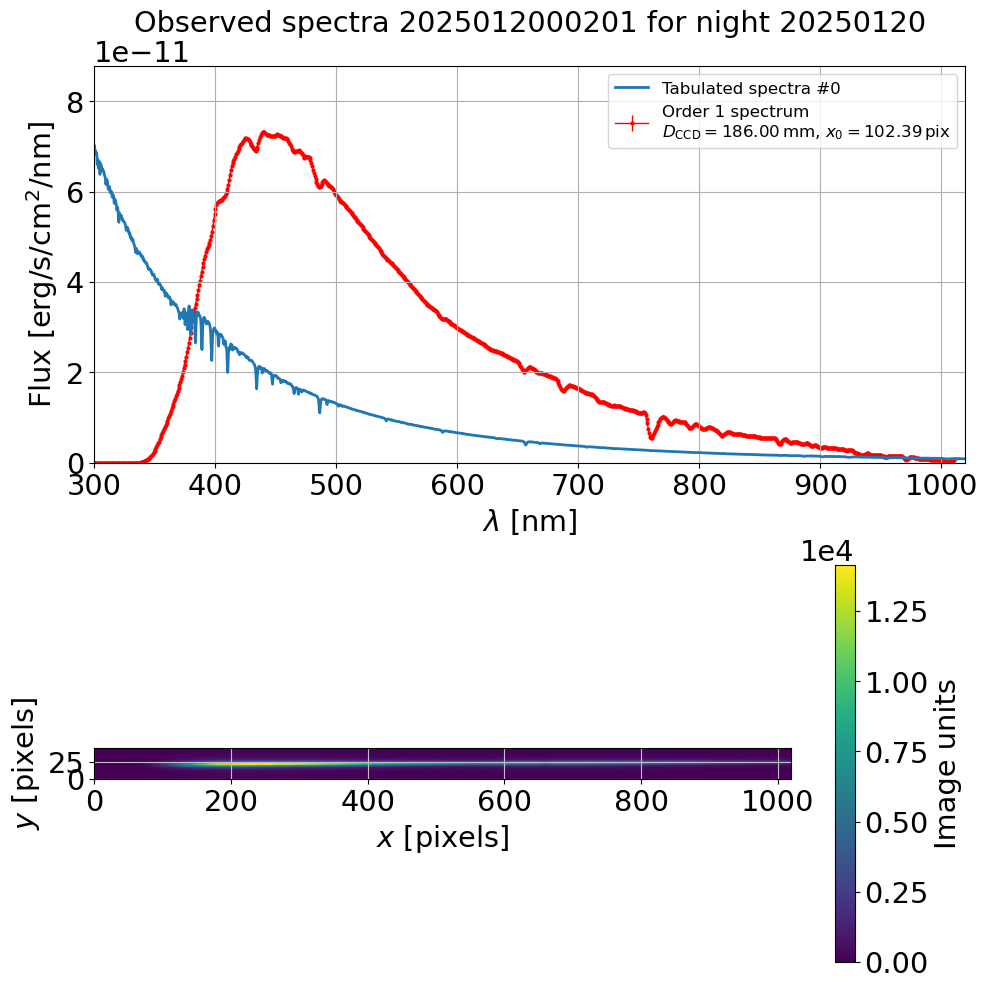

In [33]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,10),layout="constrained")
#plot_spectra_ax(all_spectra, ax, [spec.airmass for spec in all_spectra],dateobs=DATEOBS)
all_spectra[0].plot_spectrum(ax=ax1)
all_spectra[0].plot_spectrogram(ax=ax2)
ax1.set_title(f"Observed spectra {visitId} for night {DATEOBS}")

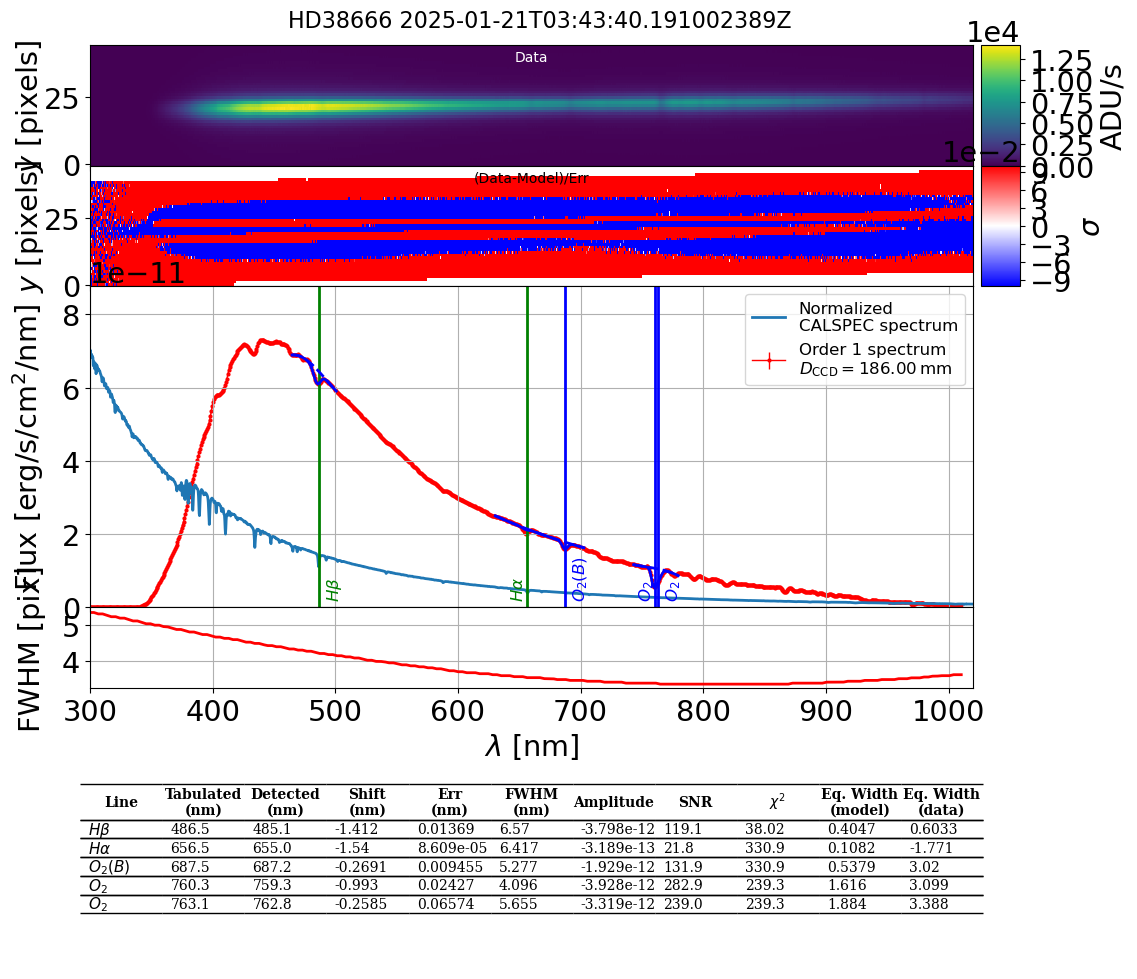

In [36]:
all_spectra[0].plot_spectrum_summary()

In [34]:
assert False

AssertionError: 

In [ ]:
display.clearViewer() 
afwDisplay.setDefaultBackend('firefly')

In [ ]:
assert False

# Example for all visits

In [ ]:
list_of_visitId = list(df_science.id)
image_count = 0

# loop on visit id
for idcount, visitId in enumerate(list_of_visitId):
    dataId = {'visit': visitId, 'instrument':instrument }
    datasetRefs = registry.queryDatasets('postISRCCD', dataId=dataId, collections  = the_collection )
    dataId = {'visit': visitId, 'instrument':instrument}

    # loop on image on the focal surface
    for i, ref in enumerate(datasetRefs):
        exposure = ref.dataId["exposure"]
        detector = ref.dataId["detector"]
        physical_filter = ref.dataId["physical_filter"]
        postisrccd  = butler.get(ref)
        the_title = f"id : {exposure}, det = {detector}, b = {physical_filter}"
        display = afwDisplay.Display(frame=count)
        display.scale('asinh', 'zscale')
        display.mtv(postisrccd.image,title=the_title)
        image_count +=1
        
    N = len(title_dict)

 